<h2 style="text-align:center; background-color: #FFFFFF;">
  <span style="color: #FF0000;">I</span>
  <span style="color: #FF8C00;">d</span>
  <span style="color: #FFD700;">e</span>
  <span style="color: #00FF00;">a</span>
  <span style="color: #0000FF;"> </span>
  <span style="color: #4B0082;">o</span>
  <span style="color: #8B00FF;">f</span>
  <span style="color: #FF0000;"> </span>
  <span style="color: #FF8C00;">F</span>
  <span style="color: #FFD700;">o</span>
  <span style="color: #00FF00;">r</span>
  <span style="color: #0000FF;">e</span>
  <span style="color: #4B0082;">c</span>
  <span style="color: #8B00FF;">a</span>
  <span style="color: #FF0000;">s</span>
  <span style="color: #FF8C00;">t</span>
  <span style="color: #FFD700;">i</span>
  <span style="color: #00FF00;">n</span>
  <span style="color: #0000FF;">g</span>
  <span style="color: #4B0082;"> </span>
  <span style="color: #8B00FF;">D</span>
  <span style="color: #FF0000;">e</span>
  <span style="color: #FF8C00;">t</span>
  <span style="color: #FFD700;">a</span>
  <span style="color: #00FF00;">i</span>
  <span style="color: #0000FF;">l</span>
  <span style="color: #4B0082;">h</span>
  <span style="color: #8B00FF;">a</span>
  <span style="color: #FF0000;">n</span>
  <span style="color: #FF8C00;">d</span>
  <span style="color: #FFD700;">e</span>
  <span style="color: #00FF00;">l</span>
  <span style="color: #0000FF;">s</span>
  <span style="color: #4B0082;">u</span>
  <span style="color: #8B00FF;">m</span>
  <span style="color: #FF0000;">s</span>
  <span style="color: #FF8C00;">ä</span>
  <span style="color: #FFD700;">t</span>
  <span style="color: #00FF00;">z</span>
  <span style="color: #0000FF;">e</span>
</h2>
<p>based on economic and societal and political indicators:</p>
<ul>
  <li>interest rates, inflation, unemployment, GDP</li>
  <li>consumer confidence, consumer spending</li>
  <li>political stability, trade agreements, etc.</li>
  <li>weather, holidays, etc.</li>
  <li>COVID-19</li>
  <li>Population</li>
  <li>etc.</li>
</ul>

         0     1            2
0     Date    D0        Value
1  2002-01    I0  79.57261641
2  2002-01  VVP0   2.42950405
3  2002-01    I1  80.01688094
4  2002-01  VVP1   2.06489957


/var/folders/rt/8pf1f2_x7sj69ytpkljsggxr0000gn/T/ipykernel_24995/3264636122.py:17: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data[0] = pd.to_datetime(data[0], infer_datetime_format=True, errors='coerce')
/var/folders/rt/8pf1f2_x7sj69ytpkljsggxr0000gn/T/ipykernel_24995/3264636122.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[0] = pd.to_datetime(data[0], infer_datetime_format=True, errors='coerce')
/var/folders/rt/8pf1f2_x7sj69ytpkljsggxr0000gn/T/ipykernel_24995/3264636122.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

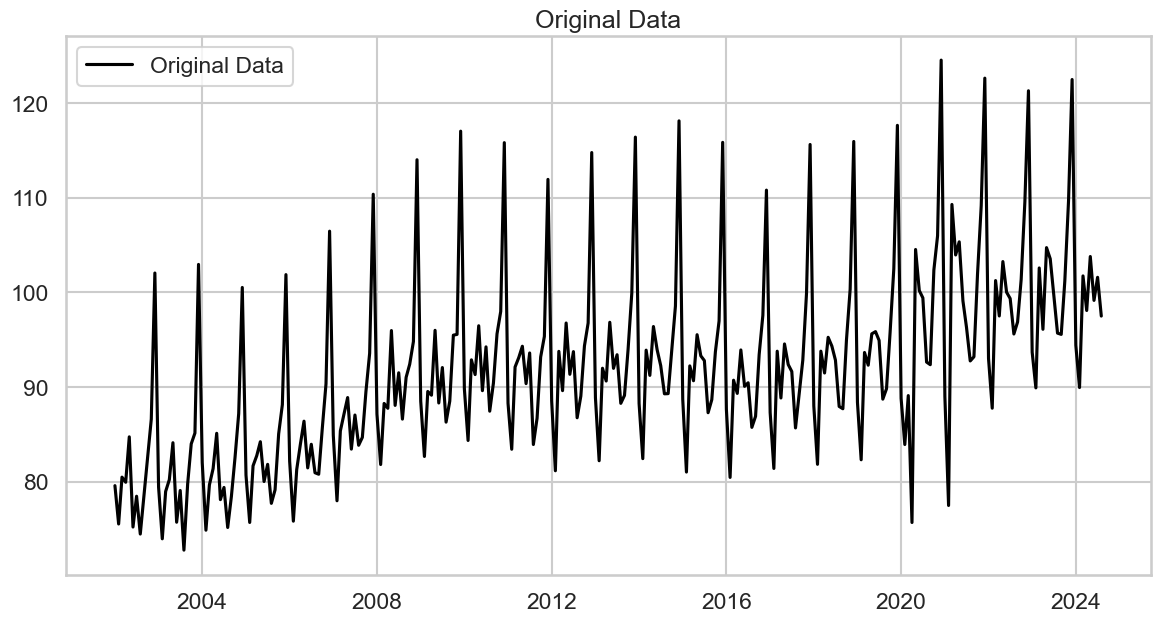

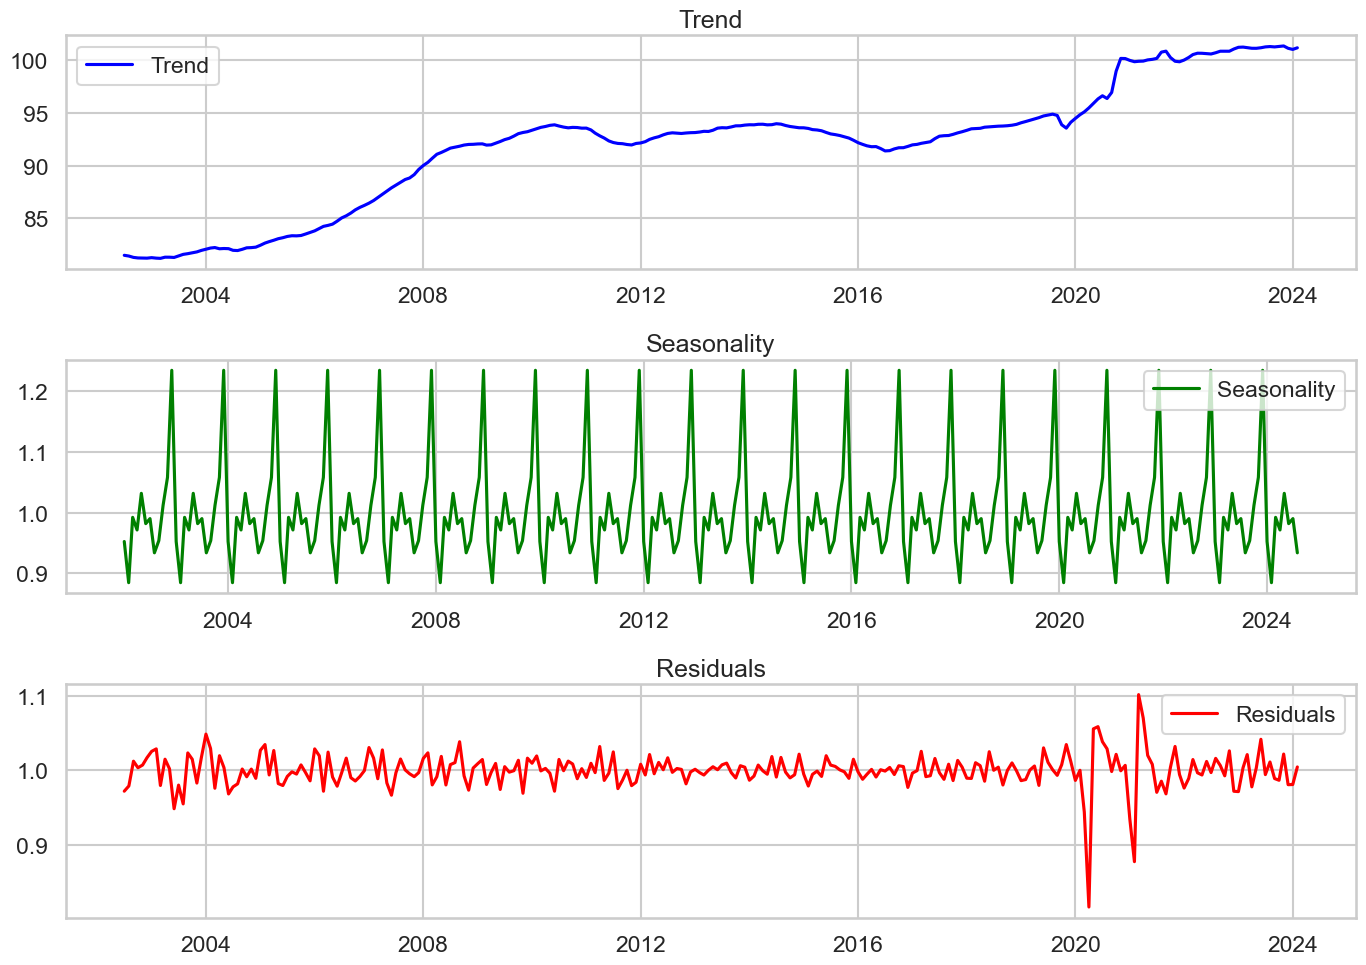

In [10]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Set Seaborn style
sns.set(style='whitegrid', context='talk')

# Load the data, skipping the first row if it contains headers
data = pd.read_csv('./snb-data-conretail-de-all-20241021_0900.csv', skiprows=3, header=None, delimiter=';', on_bad_lines='skip')

# Inspect the first few rows of the DataFrame to understand its structure
print(data.head())

# Convert the date column to datetime format, inferring the format
data[0] = pd.to_datetime(data[0], infer_datetime_format=True, errors='coerce')

# Filter the data for 'I0' type
i0_data = data[data[1] == 'I0']

# Set the date column as the index
i0_data.set_index(0, inplace=True)

# Convert the value column to numeric
i0_data[2] = pd.to_numeric(i0_data[2])

# Plot the original data
plt.figure(figsize=(14, 7))
plt.plot(i0_data[2], label='Original Data', color='black')
plt.title('Original Data')
plt.legend(loc='best')
plt.show()

# Perform seasonal decomposition
decomposition = seasonal_decompose(i0_data[2], model='multiplicative', period=12)

# Plot the trend and the deseasonalized data
plt.figure(figsize=(14, 10))

plt.subplot(311)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.title('Trend')
plt.legend(loc='best')

plt.subplot(312)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonality')
plt.legend(loc='best')

plt.subplot(313)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

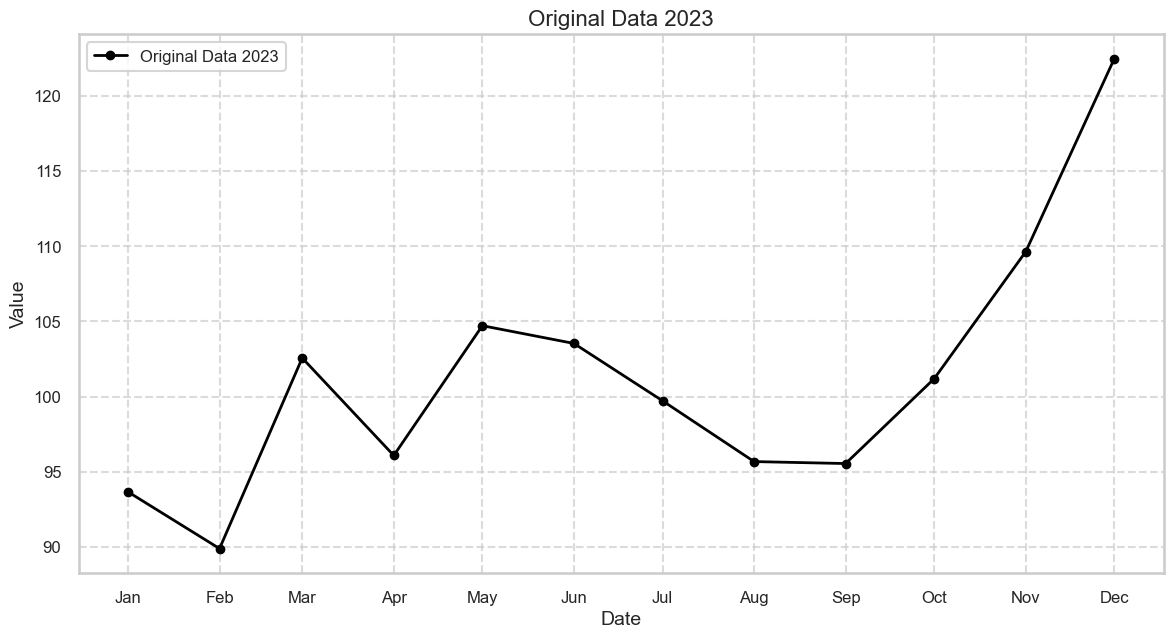

In [11]:
import matplotlib.dates as mdates

# Ensure the index is a datetime index
i0_data.index = pd.to_datetime(i0_data.index)

# Filter the data for the year 2023
i0_data_2023 = i0_data[i0_data.index.year == 2023]

# Plot the original data for 2023
plt.figure(figsize=(14, 7))
plt.plot(i0_data_2023[2], label='Original Data 2023', color='black', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.title('Original Data 2023', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the x-axis major locator to month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()